<a href="https://colab.research.google.com/github/katakamsandeep123/car-price-prediction/blob/main/machine_learning_team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAR PRICE PREDICTION**

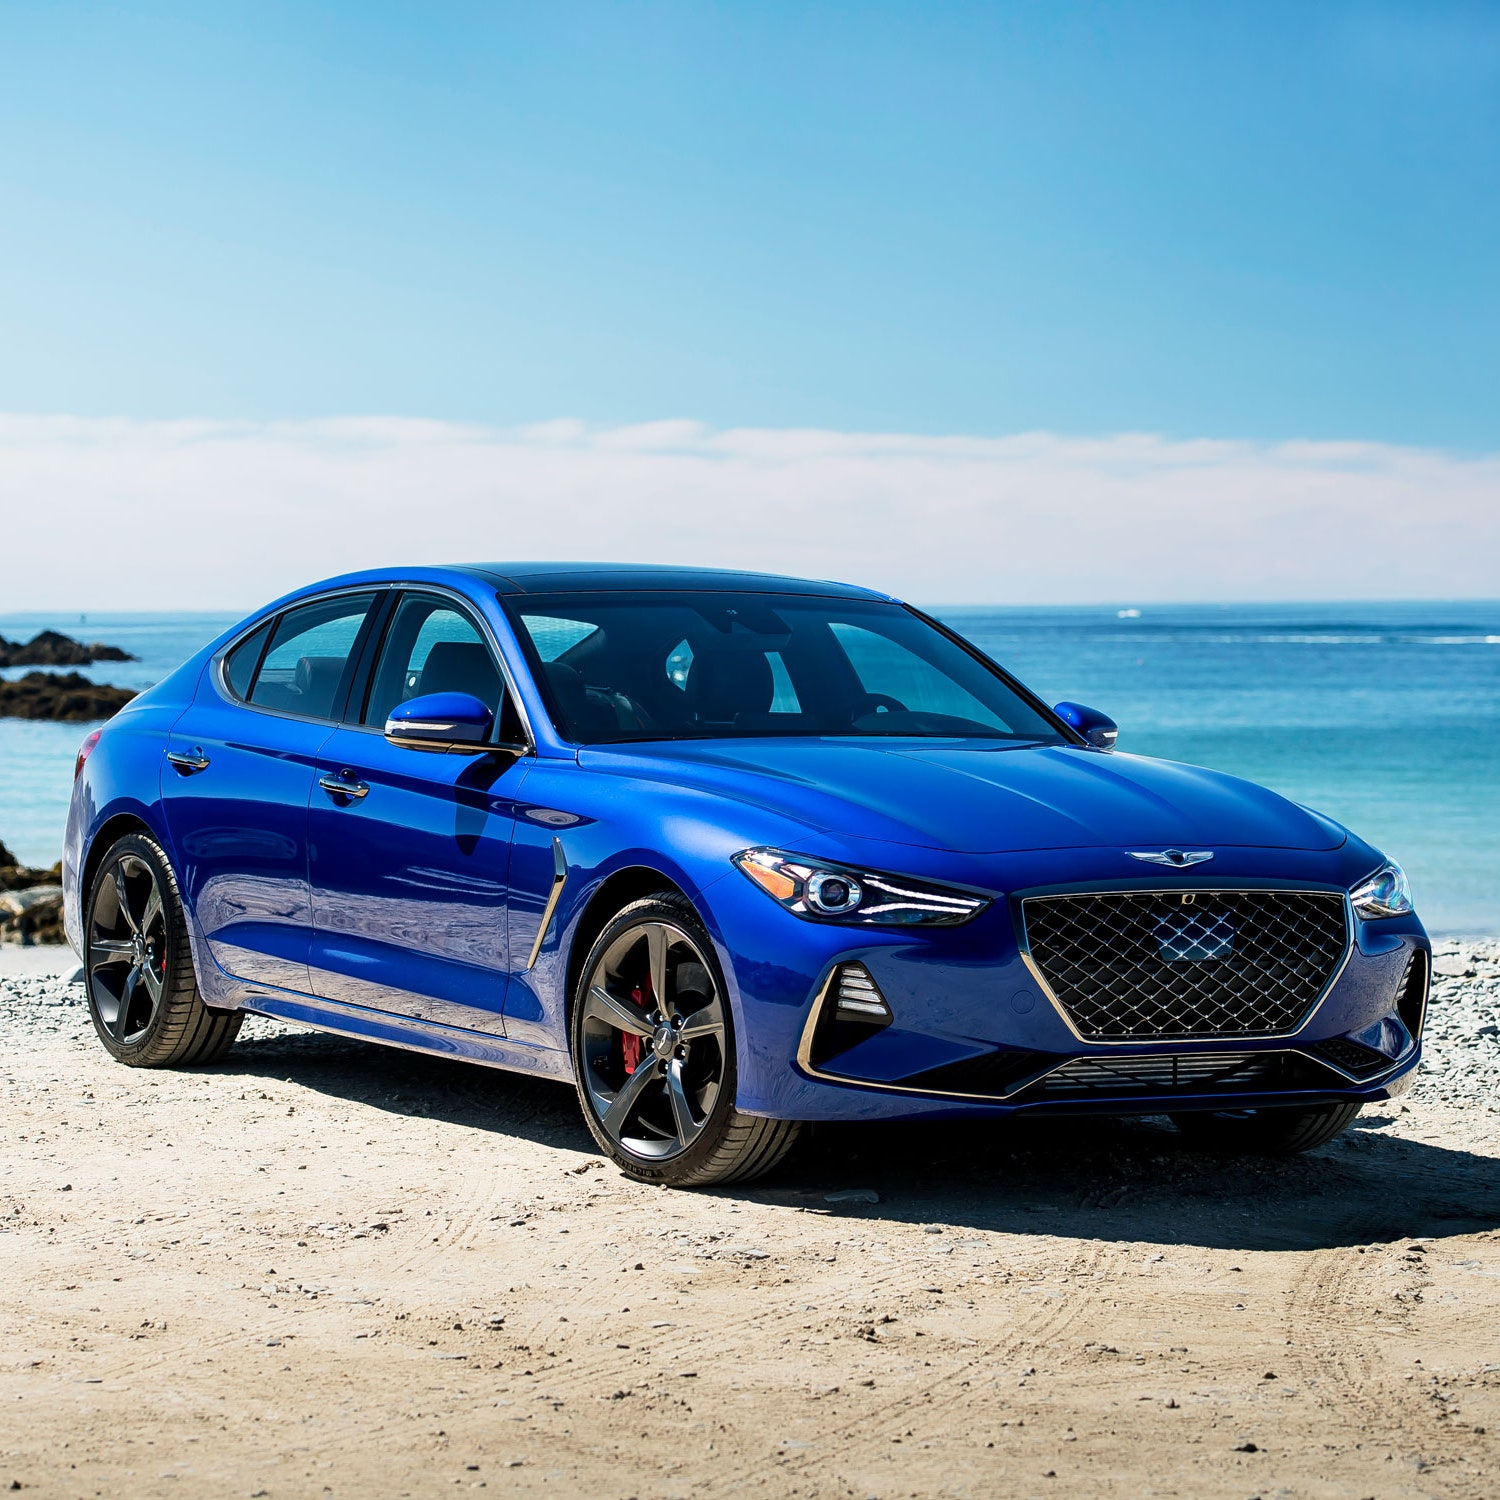

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


READING FILE AND OPRRATIONS

In [ ]:
df=pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


some operations regarding the project

In [ ]:
df.head() #first 5 rows of the dataset 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape # gives the entire rows n columns of the dataset

(301, 9)

In [ ]:
df["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df["Owner"].unique()

array([0, 1, 3])

In [ ]:
#checking null values in the dataset
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# removing unwanted data in the dataset

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
#removing car name because it contains numerous name so it may be difficult to train the model
final_df=df[["Year",'Selling_Price',"Kms_Driven",'Present_Price',"Fuel_Type",'Seller_Type', "Transmission","Owner"]]
final_df

,Year,Selling_Price,Kms_Driven,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,27000,5.59,Petrol,Dealer,Manual,0
1,2013,4.75,43000,9.54,Diesel,Dealer,Manual,0
2,2017,7.25,6900,9.85,Petrol,Dealer,Manual,0
3,2011,2.85,5200,4.15,Petrol,Dealer,Manual,0
4,2014,4.60,42450,6.87,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,33988,11.60,Diesel,Dealer,Manual,0
297,2015,4.00,60000,5.90,Petrol,Dealer,Manual,0
298,2009,3.35,87934,11.00,Petrol,Dealer,Manual,0
299,2017,11.50,9000,12.50,Diesel,Dealer,Manual,0


In [ ]:
final_df.head()

,Year,Selling_Price,Kms_Driven,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,27000,5.59,Petrol,Dealer,Manual,0
1,2013,4.75,43000,9.54,Diesel,Dealer,Manual,0
2,2017,7.25,6900,9.85,Petrol,Dealer,Manual,0
3,2011,2.85,5200,4.15,Petrol,Dealer,Manual,0
4,2014,4.60,42450,6.87,Diesel,Dealer,Manual,0


In [ ]:
final_df["current_year"]=2020

In [ ]:
final_df.head()

,Year,Selling_Price,Kms_Driven,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,27000,5.59,Petrol,Dealer,Manual,0,2020
1,2013,4.75,43000,9.54,Diesel,Dealer,Manual,0,2020
2,2017,7.25,6900,9.85,Petrol,Dealer,Manual,0,2020
3,2011,2.85,5200,4.15,Petrol,Dealer,Manual,0,2020
4,2014,4.60,42450,6.87,Diesel,Dealer,Manual,0,2020


In [ ]:
final_df["no_year"]=final_df["current_year"]-final_df["Year"]
final_df.head()

,Year,Selling_Price,Kms_Driven,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,2014,3.35,27000,5.59,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,43000,9.54,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,6900,9.85,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,5200,4.15,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,42450,6.87,Diesel,Dealer,Manual,0,2020,6


In [ ]:
final_df.drop(["Year"],axis=1,inplace=True)
final_df.drop(["current_year"],axis=1,inplace=True)
final_df.head()

,Selling_Price,Kms_Driven,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,27000,5.59,Petrol,Dealer,Manual,0,6
1,4.75,43000,9.54,Diesel,Dealer,Manual,0,7
2,7.25,6900,9.85,Petrol,Dealer,Manual,0,3
3,2.85,5200,4.15,Petrol,Dealer,Manual,0,9
4,4.60,42450,6.87,Diesel,Dealer,Manual,0,6


In [ ]:
final_dataset=pd.get_dummies(final_df,drop_first=True)
final_dataset.head()


,Selling_Price,Kms_Driven,Present_Price,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,27000,5.59,0,6,0,1,0,1
1,4.75,43000,9.54,0,7,1,0,0,1
2,7.25,6900,9.85,0,3,0,1,0,1
3,2.85,5200,4.15,0,9,0,1,0,1
4,4.60,42450,6.87,0,6,1,0,0,1


In [ ]:
final_dataset

,Selling_Price,Kms_Driven,Present_Price,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,27000,5.59,0,6,0,1,0,1
1,4.75,43000,9.54,0,7,1,0,0,1
2,7.25,6900,9.85,0,3,0,1,0,1
3,2.85,5200,4.15,0,9,0,1,0,1
4,4.60,42450,6.87,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,33988,11.60,0,4,1,0,0,1
297,4.00,60000,5.90,0,5,0,1,0,1
298,3.35,87934,11.00,0,11,0,1,0,1
299,11.50,9000,12.50,0,3,1,0,0,1


In [ ]:
correlation=final_df.corr()       #correlates with one feature with another feature 

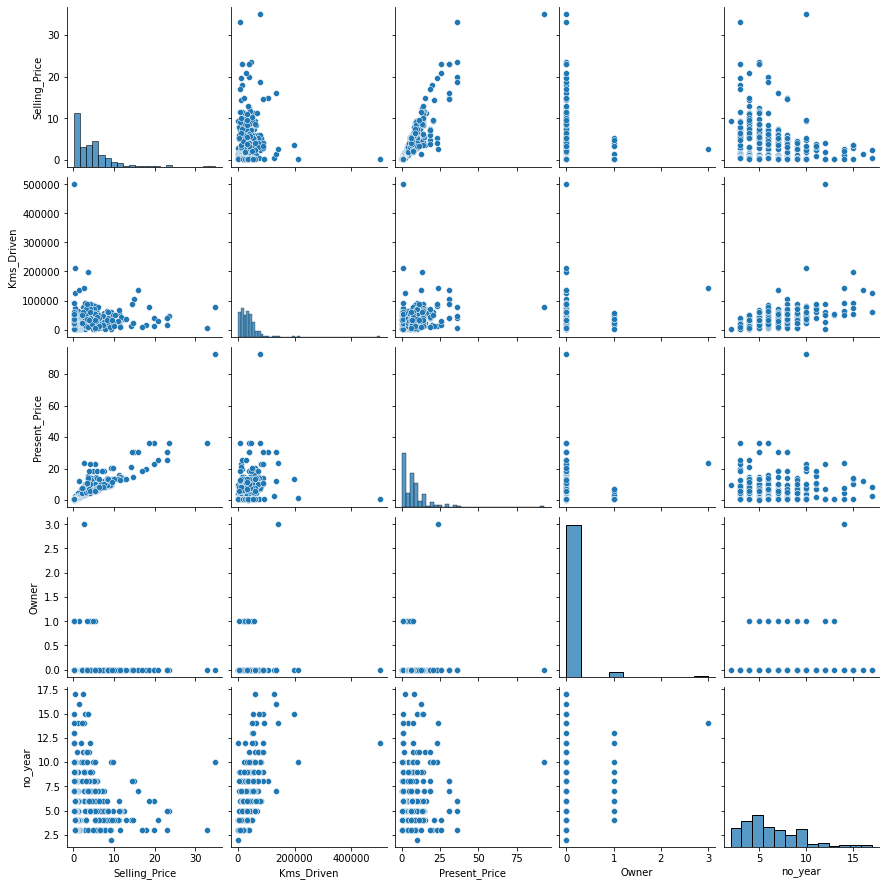

In [ ]:
#visualizing data
import seaborn as sns 
sns.pairplot(final_df)

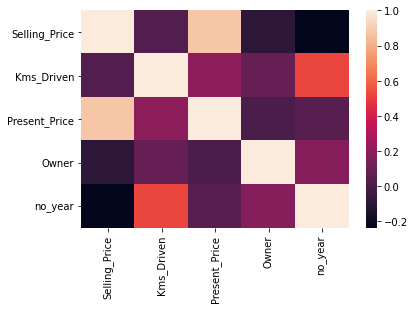

In [ ]:
#relation between the objects visualizing heatmap 
sns.heatmap(correlation)

In [ ]:
#independent and dependent features of the dataset
X=final_dataset.iloc[:,1:]
Y=final_dataset.iloc[:,0]

In [ ]:
X.head()

,Kms_Driven,Present_Price,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,27000,5.59,0,6,0,1,0,1
1,43000,9.54,0,7,1,0,0,1
2,6900,9.85,0,3,0,1,0,1
3,5200,4.15,0,9,0,1,0,1
4,42450,6.87,0,6,1,0,0,1


In [ ]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
# feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_) #present price has highest importance compared to others

[0.0415455  0.39873094 0.00133365 0.07465444 0.20800215 0.01420526
 0.12434562 0.13718243]


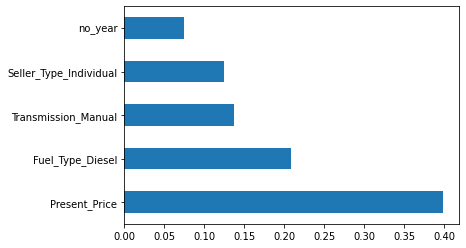

In [ ]:
#plot graph of feature importance for better visualization
feature_imp=pd.Series(model.feature_importances_,index=X.columns)
feature_imp.nlargest(5).plot(kind="barh")
plt.show()

In [ ]:
# testing training the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train.shape

(240, 8)

In [ ]:
X_test.shape

(61, 8)

In [ ]:
Y_train.shape

(240,)

In [ ]:
Y_test.shape

(61,)

#model training


1.linear regression model


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# model evaluation

In [ ]:
#prediction on training data
training_data_prediction=lr.predict(X_train)

In [ ]:
# comparing the data
from sklearn import metrics 
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error:",error_score*100)

R squared error: 88.48671969624226


#visualize the actual prices and predicted prices

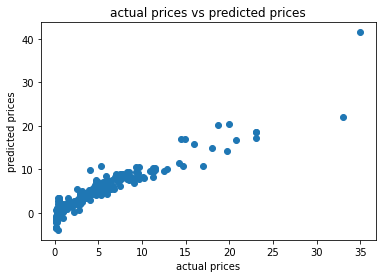

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

so values are very close to each other compared to actual prices and predicted data

#prediction on testing data


In [ ]:
#prediction on testing data
testing_data_prediction=lr.predict(X_test)


In [ ]:
# comparing the data
from sklearn import metrics 
error_score=metrics.r2_score(Y_test,testing_data_prediction)
print("R squared error:",error_score*100)

R squared error: 84.77474623696686


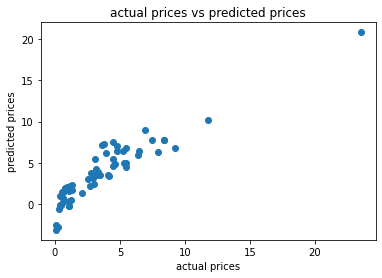

In [ ]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

# lasso regression

#model training


# 2.lasso regression model


In [ ]:
from sklearn.linear_model import Lasso
la=Lasso()

# model evaluation

In [ ]:
#prediction on training data
la.fit(X_train,Y_train)
training_data_prediction=la.predict(X_train)

In [ ]:
# comparing the data
from sklearn import metrics 
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error:",error_score*100)

R squared error: 84.2614430157967


#visualize the actual prices and predicted prices

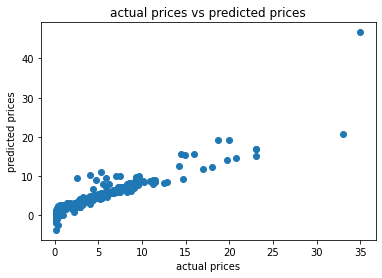

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

so values are very close to each other compared to actual prices and predicted data

#prediction on testing data


In [ ]:
#prediction on testing data
testing_data_prediction=la.predict(X_test)

In [ ]:
# comparing the data
from sklearn import metrics 
error_score=metrics.r2_score(Y_test,testing_data_prediction)
print("R squared error:",error_score*100)

R squared error: 84.77474623696686


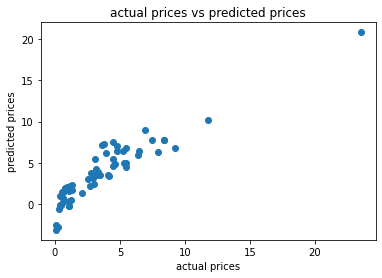

In [ ]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()